<a href="https://colab.research.google.com/github/syedmoazzam786/Books-Python/blob/main/Copy_of_Copy_of_internselite_minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/dataset/BankChurners (2).csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
print(df.shape)

(10127, 21)


In [ ]:
missing_percentages = df.isnull().mean()*100
print(missing_percentages)

CLIENTNUM                   0.0
Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64


In [ ]:
duplicate_rows = df.duplicated()
print(duplicate_rows.any())

False


Mean: 46.32596030413745
Median: 46.0
Standard deviation: 8.016814032549028


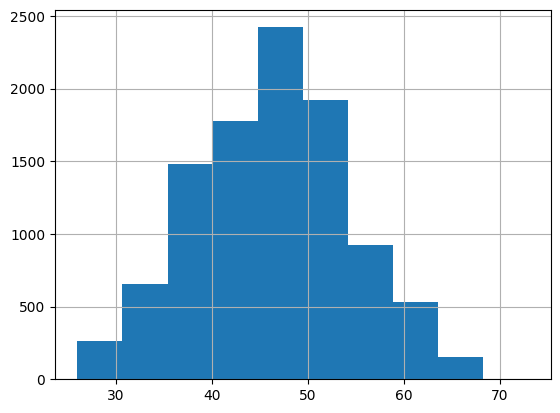

In [ ]:
age_column =df["Customer_Age"]
age_column.hist()
age_mean = age_column.mean()
age_median = age_column.median()
age_std = age_column.std()
print("Mean:",age_mean)
print("Median:",age_median)
print("Standard deviation:",age_std)

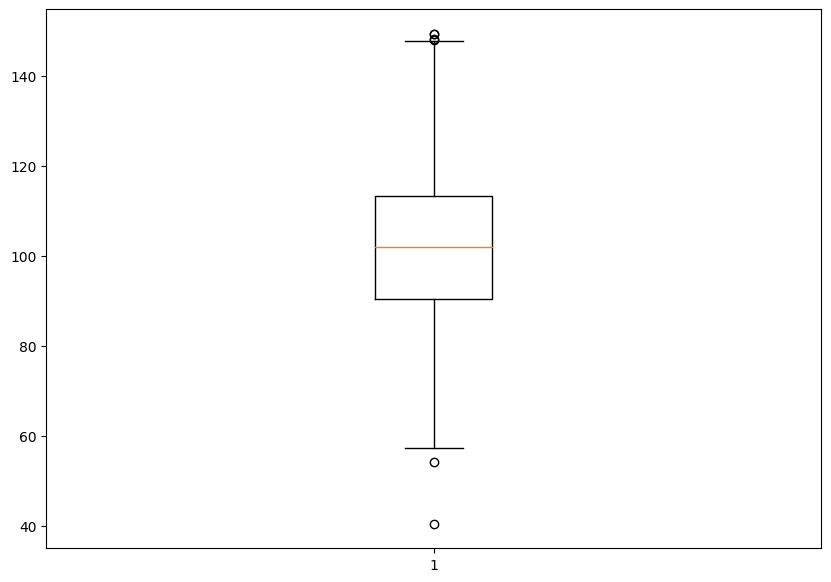

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np


# Creating dataset
np.random.seed(10)
data = np.random.normal(100, 20, 200)

fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(data)

# show plot
plt.show()


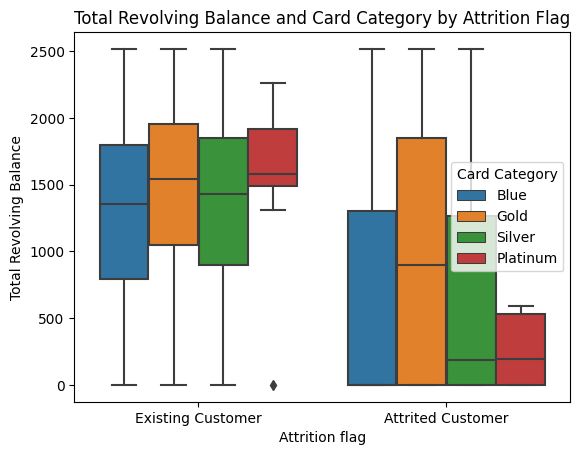

In [ ]:
sns.boxplot(x="Attrition_Flag",y="Total_Revolving_Bal",hue="Card_Category",data =df)
plt.xlabel("Attrition flag")
plt.ylabel("Total Revolving Balance")
plt.title("Total Revolving Balance and Card Category by Attrition Flag")
plt.legend(title="Card Category")
plt.show()

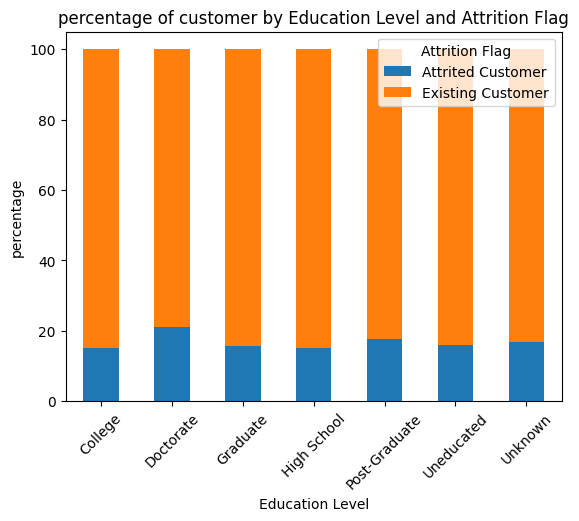

In [ ]:
education_attrition_counts = df.groupby(["Education_Level", "Attrition_Flag"]).size().unstack()
education_attrition_percentages = education_attrition_counts.div(education_attrition_counts.sum(axis =1),axis =0)*100
education_attrition_percentages.plot(kind="bar",stacked=True)

plt.xlabel("Education Level")
plt.ylabel("percentage")
plt.title("percentage of customer by Education Level and Attrition Flag")
plt.legend(title= "Attrition Flag")
plt.xticks(rotation = 45)
plt.show()

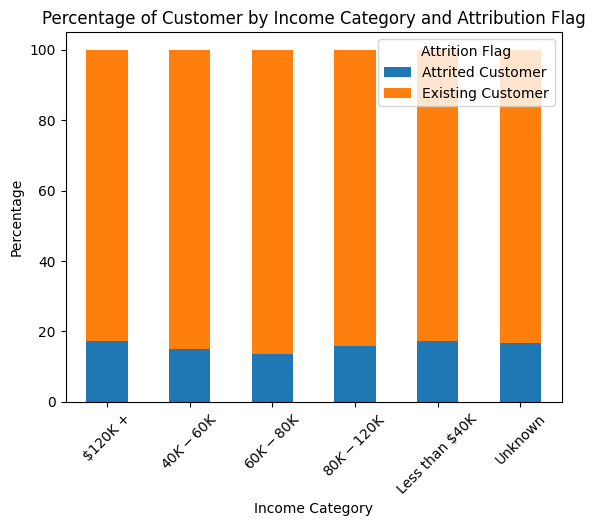

In [ ]:
income_attrition_counts = df.groupby(["Income_Category","Attrition_Flag"]).size().unstack()
income_attrition_percentages = income_attrition_counts.div(income_attrition_counts.sum(axis =1),axis =0)*100

income_attrition_percentages.plot(kind ="bar", stacked = True)

plt.xlabel("Income Category")
plt.ylabel("Percentage")
plt.title("Percentage of Customer by Income Category and Attribution Flag")
plt.legend(title="Attrition Flag")
plt.xticks(rotation=45)
plt.show()

<ipython-input-17-affe47e9a93d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = numerical_columns.corr()


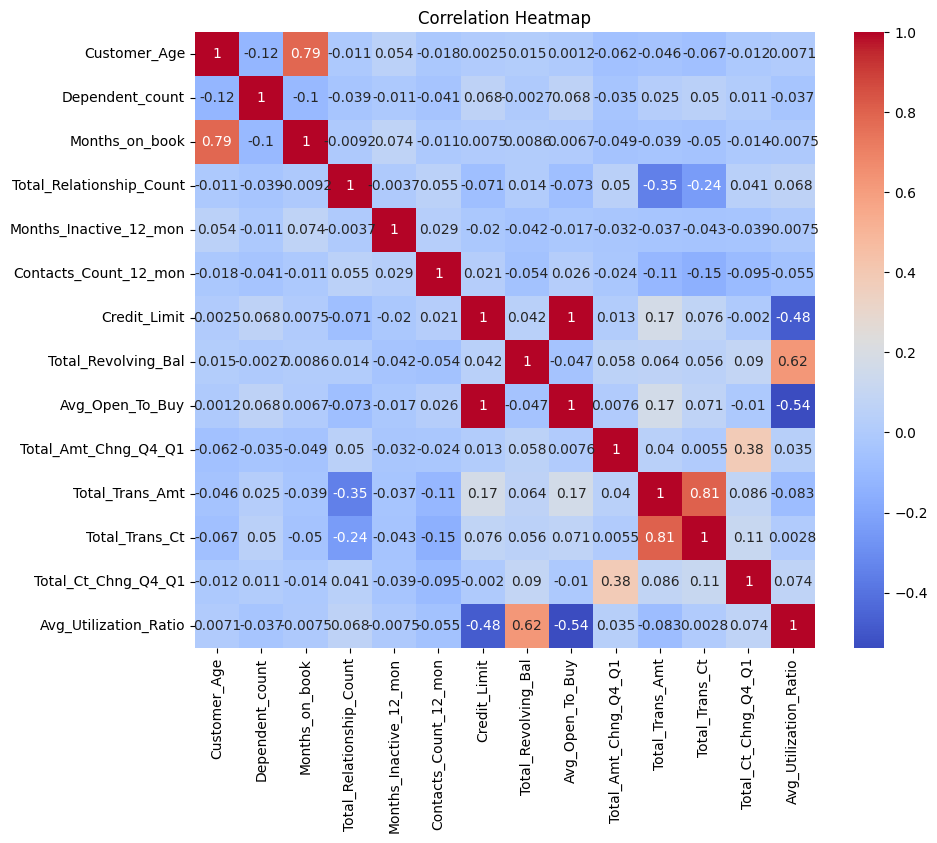

In [ ]:
numerical_columns = df.select_dtypes(include=["int64","float64"])
numerical_columns = numerical_columns.drop("CLIENTNUM",axis=1)
numerical_columns["Attrition F lag"] =df["Attrition_Flag"]

correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

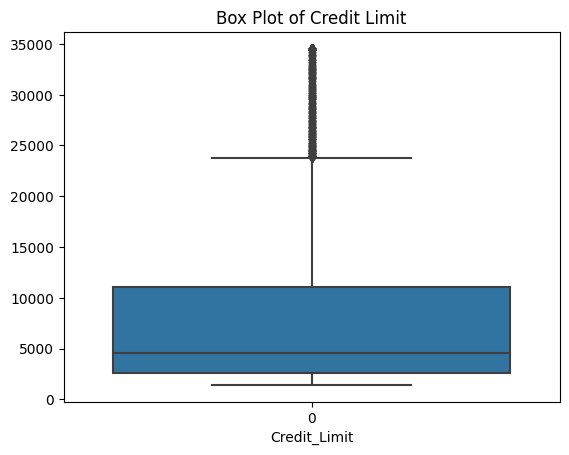

In [ ]:
sns.boxplot(data=df["Credit_Limit"])
plt.xlabel("Credit_Limit")
plt.title("Box Plot of Credit Limit")
plt.show()

In [ ]:
df["Attrition_Flag"] = df['Attrition_Flag'].map({"Existing Customer":0,"Attrited Customer":1})
numerical_columns = df.select_dtypes(include=["int64","float64"])
scaler = StandardScaler()
numerical_columns_standardized = pd.DataFrame(scaler.fit_transform(numeical_coliumns),columns=numerical_columns.columns)
df_standardized = pd.concat([numerical_columns_standardized, df["Attrition Flag"]],axis =1)

NameError: ignored